## Friedman Tests

##### Import Packages

In [110]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare, wilcoxon
import matplotlib.pyplot as plt

##### Utils

In [111]:
datasets = [
    'mushroom', 'tic-tac-toe', 'hepatitis', 'ljubljana', 'car-good', 'kr-vs-k', 
    'zoo-3', 'flare-f', 'yeast3', 'abalone19', 'segment0', 'page-blocks0'
]

In [112]:
def get_ranking_df(df_values):

    df_ranks = df_values.rank(axis=1, ascending=False, method='average')
    avg_ranks = df_ranks.mean(axis=0)
    df_ranks.loc['Average Rank'] = avg_ranks
    df_ranks= df_ranks.map(lambda x: f'{x:g}')
    
    return df_ranks

def get_ranking(df_values):
    ranks = df_values.rank(axis=1, ascending=False, method='average')
    df_out = df_values.map('{:g}'.format) + " (" + ranks.map('{:g}'.format) + ")"
    df_out.loc['Average Rank'] = ranks.mean().map('{:.4g}'.format)

    return df_out, ranks.mean()

def plot_avg_ranks(avg_ranks, metric_name):
    sorted_avg_ranks = avg_ranks.sort_values()
    plt.figure(figsize=(12, 6))
    sorted_avg_ranks.plot(kind='barh', color='lightgrey')
    plt.title(f'Average Rank of Each Variant for {metric_name}')
    plt.xlabel('Mean Rank')
    
    plt.axvline(x=sorted_avg_ranks.mean(), color='red', linestyle='--', label='Global Average')
    plt.legend()
    plt.tight_layout()
    plt.show()

##### Ranking

1. Accuracy

In [113]:
accuracy_dict = {
    'AM(sp, se)':        [93.53, 72.54, 76.77, 77.58, 95.54, 96.14, 94.05, 93.62, 87.99, 98.66, 94.20, 82.58],
    'MOEA-AM(sp, se)':   [67.18, 65.04, 83.23, 65.45, 95.89, 96.00, 95.05, 95.50, 90.10, 98.71, 94.16, 80.04],
    'MOEA-AM*(sp, se)':  [78.74, 57.72, 81.29, 65.43, 95.78, 96.28, 95.05, 95.97, 89.47, 98.71, 96.70, 80.04],
    
    'AM(conf, si)':      [94.76, 70.46, 75.48, 72.07, 95.89, 98.35, 95.05, 95.31, 88.55, 98.38, 86.56, 80.43],
    'MOEA-AM(conf, si)': [99.70, 72.35, 81.29, 65.07, 95.78, 97.35, 95.05, 95.97, 90.17, 98.71, 89.81, 79.71],
    'MOEA-AM*(conf, si)':[99.16, 70.15, 81.94, 70.96, 95.31, 96.69, 95.05, 96.25, 89.12, 98.71, 95.11, 79.71],
    
    'AM(conf, sp)':      [99.63, 80.90, 76.13, 65.04, 97.22, 99.03, 95.05, 95.31, 87.08, 98.38, 88.26, 77.11],
    'MOEA-AM(conf, sp)': [99.95, 86.53, 83.23, 68.75, 95.66, 97.48, 95.05, 95.50, 90.03, 98.71, 94.16, 80.30],
    'MOEA-AM*(conf, sp)':[95.88, 86.74, 80.00, 65.79, 95.78, 96.52, 95.05, 95.97, 90.03, 98.71, 95.71, 80.30],
    
    'AM(conf, se)':      [85.96, 79.85, 79.35, 70.97, 96.64, 96.69, 95.05, 95.87, 87.99, 98.58, 86.41, 78.67],
    'MOEA-AM(conf, se)': [78.58, 43.12, 83.87, 68.38, 95.60, 96.45, 95.05, 96.15, 90.17, 98.71, 89.81, 79.00],
    'MOEA-AM*(conf, se)':[75.55, 68.05, 83.87, 66.15, 95.14, 96.66, 95.05, 96.15, 90.10, 98.71, 94.66, 79.00]
}

accuracy_df = pd.DataFrame(accuracy_dict, index=datasets)
accuracy_ranks, accuracy_avg_ranks = get_ranking(accuracy_df)
accuracy_ranks

,"AM(sp, se)","MOEA-AM(sp, se)","MOEA-AM*(sp, se)","AM(conf, si)","MOEA-AM(conf, si)","MOEA-AM*(conf, si)","AM(conf, sp)","MOEA-AM(conf, sp)","MOEA-AM*(conf, sp)","AM(conf, se)","MOEA-AM(conf, se)","MOEA-AM*(conf, se)"
mushroom,93.53 (7),67.18 (12),78.74 (9),94.76 (6),99.7 (2),99.16 (4),99.63 (3),99.95 (1),95.88 (5),85.96 (8),78.58 (10),75.55 (11)
tic-tac-toe,72.54 (5),65.04 (10),57.72 (11),70.46 (7),72.35 (6),70.15 (8),80.9 (3),86.53 (2),86.74 (1),79.85 (4),43.12 (12),68.05 (9)
hepatitis,76.77 (10),83.23 (3.5),81.29 (6.5),75.48 (12),81.29 (6.5),81.94 (5),76.13 (11),83.23 (3.5),80 (8),79.35 (9),83.87 (1.5),83.87 (1.5)
ljubljana,77.58 (1),65.45 (9),65.43 (10),72.07 (2),65.07 (11),70.96 (4),65.04 (12),68.75 (5),65.79 (8),70.97 (3),68.38 (6),66.15 (7)
car-good,95.54 (10),95.89 (3.5),95.78 (6),95.89 (3.5),95.78 (6),95.31 (11),97.22 (1),95.66 (8),95.78 (6),96.64 (2),95.6 (9),95.14 (12)
kr-vs-k,96.14 (11),96 (12),96.28 (10),98.35 (2),97.35 (4),96.69 (5.5),99.03 (1),97.48 (3),96.52 (8),96.69 (5.5),96.45 (9),96.66 (7)
zoo-3,94.05 (12),95.05 (6),95.05 (6),95.05 (6),95.05 (6),95.05 (6),95.05 (6),95.05 (6),95.05 (6),95.05 (6),95.05 (6),95.05 (6)
flare-f,93.62 (12),95.5 (8.5),95.97 (5),95.31 (10.5),95.97 (5),96.25 (1),95.31 (10.5),95.5 (8.5),95.97 (5),95.87 (7),96.15 (2.5),96.15 (2.5)
yeast3,87.99 (10.5),90.1 (3.5),89.47 (7),88.55 (9),90.17 (1.5),89.12 (8),87.08 (12),90.03 (5.5),90.03 (5.5),87.99 (10.5),90.17 (1.5),90.1 (3.5)
abalone19,98.66 (9),98.71 (4.5),98.71 (4.5),98.38 (11.5),98.71 (4.5),98.71 (4.5),98.38 (11.5),98.71 (4.5),98.71 (4.5),98.58 (10),98.71 (4.5),98.71 (4.5)


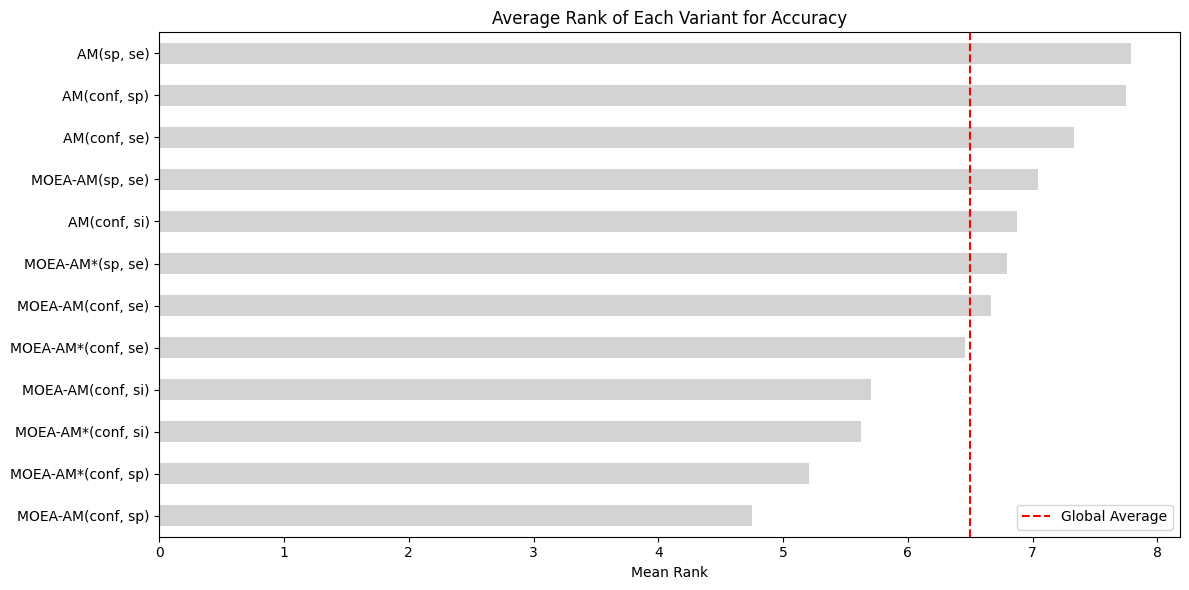

In [114]:
plot_avg_ranks(accuracy_avg_ranks, "Accuracy")

2. F1-score

In [115]:
f1_dict = {
    'AM(sp, se)':        [93.46, 70.97, 75.91, 75.37, 95.82, 96.38, 92.12, 93.80, 84.77, 98.04, 94.48, 79.14],
    'MOEA-AM(sp, se)':   [62.33, 64.49, 82.62, 66.73, 94.18, 96.19, 92.63, 94.54, 89.36, 98.06, 93.92, 74.47],
    'MOEA-AM*(sp, se)':  [77.86, 58.42, 80.92, 66.20, 94.65, 96.65, 92.63, 94.25, 88.32, 98.06, 96.70, 74.47],
    
    'AM(conf, si)':      [94.70, 67.43, 74.50, 68.92, 93.99, 98.18, 92.63, 93.90, 83.44, 97.90, 81.62, 75.02],
    'MOEA-AM(conf, si)': [99.70, 72.43, 79.89, 60.53, 94.12, 96.51, 92.63, 93.99, 88.64, 98.06, 88.40, 72.80],
    'MOEA-AM*(conf, si)':[99.16, 68.26, 80.90, 68.24, 94.12, 96.40, 92.63, 95.27, 87.56, 98.06, 94.98, 72.80],
    
    'AM(conf, sp)':      [99.63, 79.93, 74.74, 61.92, 96.97, 98.98, 92.63, 94.59, 83.33, 97.95, 83.75, 75.14],
    'MOEA-AM(conf, sp)': [99.95, 86.26, 79.70, 59.74, 94.12, 96.81, 92.63, 94.61, 88.87, 98.06, 93.90, 75.01],
    'MOEA-AM*(conf, sp)':[95.85, 86.87, 79.17, 63.08, 94.70, 96.20, 92.63, 95.01, 89.24, 98.06, 95.73, 75.01],
    
    'AM(conf, se)':      [85.62, 77.98, 72.98, 67.09, 96.47, 95.96, 92.63, 94.25, 84.77, 98.00, 82.95, 74.06],
    'MOEA-AM(conf, se)': [76.90, 34.50, 81.97, 68.56, 94.36, 96.71, 92.63, 95.34, 88.63, 98.06, 88.42, 71.93],
    'MOEA-AM*(conf, se)':[73.99, 68.59, 83.32, 66.43, 94.03, 96.80, 92.63, 94.97, 88.71, 98.06, 94.57, 71.93]
}

f1_df = pd.DataFrame(f1_dict, index=datasets)
f1_ranks, f1_avg_ranks = get_ranking(f1_df)
f1_ranks

,"AM(sp, se)","MOEA-AM(sp, se)","MOEA-AM*(sp, se)","AM(conf, si)","MOEA-AM(conf, si)","MOEA-AM*(conf, si)","AM(conf, sp)","MOEA-AM(conf, sp)","MOEA-AM*(conf, sp)","AM(conf, se)","MOEA-AM(conf, se)","MOEA-AM*(conf, se)"
mushroom,93.46 (7),62.33 (12),77.86 (9),94.7 (6),99.7 (2),99.16 (4),99.63 (3),99.95 (1),95.85 (5),85.62 (8),76.9 (10),73.99 (11)
tic-tac-toe,70.97 (6),64.49 (10),58.42 (11),67.43 (9),72.43 (5),68.26 (8),79.93 (3),86.26 (2),86.87 (1),77.98 (4),34.5 (12),68.59 (7)
hepatitis,75.91 (9),82.62 (2),80.92 (4),74.5 (11),79.89 (6),80.9 (5),74.74 (10),79.7 (7),79.17 (8),72.98 (12),81.97 (3),83.32 (1)
ljubljana,75.37 (1),66.73 (6),66.2 (8),68.92 (2),60.53 (11),68.24 (4),61.92 (10),59.74 (12),63.08 (9),67.09 (5),68.56 (3),66.43 (7)
car-good,95.82 (3),94.18 (7),94.65 (5),93.99 (12),94.12 (9),94.12 (9),96.97 (1),94.12 (9),94.7 (4),96.47 (2),94.36 (6),94.03 (11)
kr-vs-k,96.38 (9),96.19 (11),96.65 (6),98.18 (2),96.51 (7),96.4 (8),98.98 (1),96.81 (3),96.2 (10),95.96 (12),96.71 (5),96.8 (4)
zoo-3,92.12 (12),92.63 (6),92.63 (6),92.63 (6),92.63 (6),92.63 (6),92.63 (6),92.63 (6),92.63 (6),92.63 (6),92.63 (6),92.63 (6)
flare-f,93.8 (12),94.54 (7),94.25 (8.5),93.9 (11),93.99 (10),95.27 (2),94.59 (6),94.61 (5),95.01 (3),94.25 (8.5),95.34 (1),94.97 (4)
yeast3,84.77 (9.5),89.36 (1),88.32 (7),83.44 (11),88.64 (5),87.56 (8),83.33 (12),88.87 (3),89.24 (2),84.77 (9.5),88.63 (6),88.71 (4)
abalone19,98.04 (9),98.06 (4.5),98.06 (4.5),97.9 (12),98.06 (4.5),98.06 (4.5),97.95 (11),98.06 (4.5),98.06 (4.5),98 (10),98.06 (4.5),98.06 (4.5)


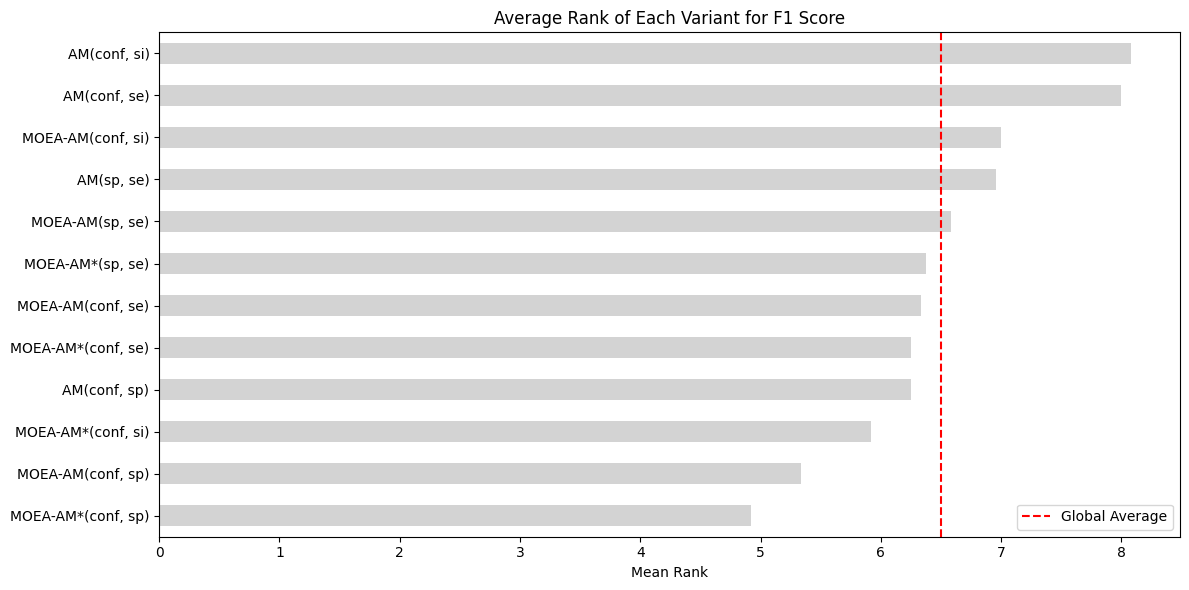

In [116]:
plot_avg_ranks(f1_avg_ranks, "F1 Score")

3. Precision

In [117]:
precision_dict = {
    'AM(sp, se)':        [94.31, 72.12, 77.01, 77.52, 96.26, 96.74, 90.29, 94.10, 82.26, 97.43, 95.16, 80.25],
    'MOEA-AM(sp, se)':   [68.88, 67.96, 82.26, 70.51, 92.87, 97.07, 90.34, 93.83, 89.01, 97.43, 93.93, 76.25],
    'MOEA-AM*(sp, se)':  [84.14, 64.88, 82.34, 69.35, 94.76, 97.28, 90.34, 92.69, 87.87, 97.43, 96.80, 76.25],
    
    'AM(conf, si)':      [95.43, 69.85, 74.14, 69.21, 92.17, 98.26, 90.34, 92.59, 81.02, 97.42, 81.84, 77.98],
    'MOEA-AM(conf, si)': [99.71, 77.40, 79.87, 59.64, 92.88, 97.42, 90.34, 92.10, 88.60, 97.43, 89.09, 76.08],
    'MOEA-AM*(conf, si)':[99.18, 69.04, 80.65, 69.34, 93.29, 97.09, 90.34, 94.84, 87.10, 97.43, 94.98, 76.08],
    
    'AM(conf, sp)':      [99.63, 81.20, 76.20, 61.37, 96.86, 99.02, 90.34, 94.10, 80.37, 97.54, 81.03, 75.35],
    'MOEA-AM(conf, sp)': [99.95, 86.88, 80.11, 57.00, 92.90, 97.55, 90.34, 93.97, 88.65, 97.43, 94.02, 77.60],
    'MOEA-AM*(conf, sp)':[96.25, 87.65, 79.40, 62.54, 94.43, 96.81, 90.34, 94.47, 89.08, 97.43, 95.89, 77.60],
    
    'AM(conf, se)':      [87.94, 81.68, 68.26, 66.04, 96.41, 95.29, 90.29, 93.10, 82.26, 97.43, 84.04, 79.33],
    'MOEA-AM(conf, se)': [84.01, 74.30, 80.87, 68.91, 93.68, 97.18, 90.34, 94.92, 88.41, 97.43, 88.91, 73.53],
    'MOEA-AM*(conf, se)':[82.37, 74.33, 83.32, 68.60, 93.05, 97.13, 90.34, 94.18, 88.85, 97.43, 94.65, 73.53]
}

precision_df = pd.DataFrame(precision_dict, index=datasets)
precision_ranks, precision_avg_ranks = get_ranking(precision_df)
precision_ranks

,"AM(sp, se)","MOEA-AM(sp, se)","MOEA-AM*(sp, se)","AM(conf, si)","MOEA-AM(conf, si)","MOEA-AM*(conf, si)","AM(conf, sp)","MOEA-AM(conf, sp)","MOEA-AM*(conf, sp)","AM(conf, se)","MOEA-AM(conf, se)","MOEA-AM*(conf, se)"
mushroom,94.31 (7),68.88 (12),84.14 (9),95.43 (6),99.71 (2),99.18 (4),99.63 (3),99.95 (1),96.25 (5),87.94 (8),84.01 (10),82.37 (11)
tic-tac-toe,72.12 (8),67.96 (11),64.88 (12),69.85 (9),77.4 (5),69.04 (10),81.2 (4),86.88 (2),87.65 (1),81.68 (3),74.3 (7),74.33 (6)
hepatitis,77.01 (9),82.26 (3),82.34 (2),74.14 (11),79.87 (7),80.65 (5),76.2 (10),80.11 (6),79.4 (8),68.26 (12),80.87 (4),83.32 (1)
ljubljana,77.52 (1),70.51 (2),69.35 (3),69.21 (5),59.64 (11),69.34 (4),61.37 (10),57 (12),62.54 (9),66.04 (8),68.91 (6),68.6 (7)
car-good,96.26 (3),92.87 (11),94.76 (4),92.17 (12),92.88 (10),93.29 (7),96.86 (1),92.9 (9),94.43 (5),96.41 (2),93.68 (6),93.05 (8)
kr-vs-k,96.74 (11),97.07 (9),97.28 (5),98.26 (2),97.42 (4),97.09 (8),99.02 (1),97.55 (3),96.81 (10),95.29 (12),97.18 (6),97.13 (7)
zoo-3,90.29 (11.5),90.34 (5.5),90.34 (5.5),90.34 (5.5),90.34 (5.5),90.34 (5.5),90.34 (5.5),90.34 (5.5),90.34 (5.5),90.29 (11.5),90.34 (5.5),90.34 (5.5)
flare-f,94.1 (5.5),93.83 (8),92.69 (10),92.59 (11),92.1 (12),94.84 (2),94.1 (5.5),93.97 (7),94.47 (3),93.1 (9),94.92 (1),94.18 (4)
yeast3,82.26 (9.5),89.01 (2),87.87 (7),81.02 (11),88.6 (5),87.1 (8),80.37 (12),88.65 (4),89.08 (1),82.26 (9.5),88.41 (6),88.85 (3)
abalone19,97.43 (6.5),97.43 (6.5),97.43 (6.5),97.42 (12),97.43 (6.5),97.43 (6.5),97.54 (1),97.43 (6.5),97.43 (6.5),97.43 (6.5),97.43 (6.5),97.43 (6.5)


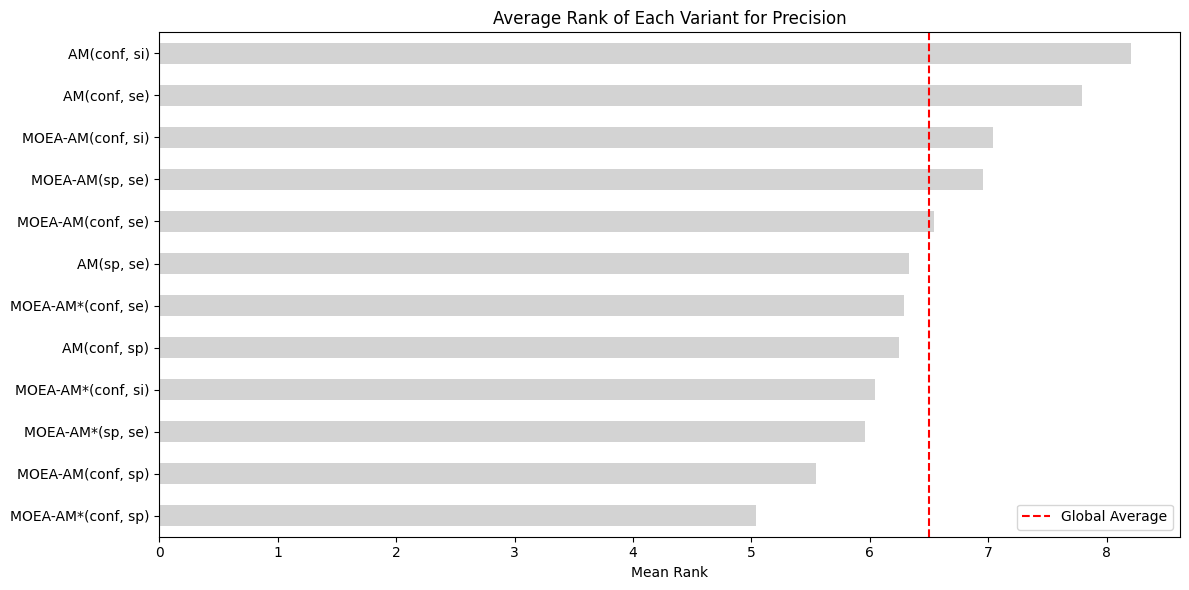

In [118]:
plot_avg_ranks(precision_avg_ranks, "Precision")

4. Specificity

In [119]:
specificity_dict = {
    'AM(sp, se)':        [99.17, 46.43, 87.00, 93.16, 97.05, 97.42, 98.95, 96.48, 97.15, 99.96, 94.92, 96.62],
    'MOEA-AM(sp, se)':   [38.42, 72.79, 91.03, 65.96, 99.76, 97.28, 100.00, 98.83, 96.20, 100.00, 98.02, 97.61],
    'MOEA-AM*(sp, se)':  [63.24, 68.70, 87.67, 68.62, 99.22, 97.18, 100.00, 99.80, 96.52, 100.00, 97.78, 97.61],
    
    'AM(conf, si)':      [100.00, 33.44, 86.83, 89.51, 99.88, 99.75, 100.00, 99.12, 99.76, 99.67, 99.53, 97.77],
    'MOEA-AM(conf, si)': [100.00, 87.07, 91.83, 85.30, 99.64, 100.00, 100.00, 100.00, 97.63, 100.00, 98.02, 98.76],
    'MOEA-AM*(conf, si)':[100.00, 40.10, 91.93, 86.44, 98.97, 98.57, 100.00, 99.41, 96.83, 100.00, 97.84, 98.76],
    
    'AM(conf, sp)':      [100.00, 57.85, 85.40, 83.20, 99.16, 99.82, 100.00, 98.54, 97.54, 99.63, 99.71, 90.27],
    'MOEA-AM(conf, sp)': [100.00, 73.19, 95.93, 95.28, 99.46, 100.00, 100.00, 98.83, 96.75, 100.00, 98.02, 97.61],
    'MOEA-AM*(conf, sp)':[100.00, 85.83, 89.43, 79.65, 99.22, 98.64, 100.00, 99.22, 96.12, 100.00, 97.14, 97.61],
    
    'AM(conf, se)':      [97.15, 48.79, 96.73, 89.50, 98.67, 99.11, 100.00, 99.71, 97.15, 99.88, 98.02, 94.71],
    'MOEA-AM(conf, se)': [62.56, 98.18, 93.47, 76.46, 99.16, 97.53, 100.00, 99.22, 97.63, 100.00, 98.02, 98.27],
    'MOEA-AM*(conf, se)':[55.15, 79.81, 90.20, 71.66, 98.73, 97.96, 100.00, 99.51, 97.39, 100.00, 97.32, 98.27]
}

specificity_df = pd.DataFrame(specificity_dict, index=datasets)
specificity_ranks, specificity_avg_ranks = get_ranking(specificity_df)
specificity_ranks

,"AM(sp, se)","MOEA-AM(sp, se)","MOEA-AM*(sp, se)","AM(conf, si)","MOEA-AM(conf, si)","MOEA-AM*(conf, si)","AM(conf, sp)","MOEA-AM(conf, sp)","MOEA-AM*(conf, sp)","AM(conf, se)","MOEA-AM(conf, se)","MOEA-AM*(conf, se)"
mushroom,99.17 (7),38.42 (12),63.24 (9),100 (3.5),100 (3.5),100 (3.5),100 (3.5),100 (3.5),100 (3.5),97.15 (8),62.56 (10),55.15 (11)
tic-tac-toe,46.43 (10),72.79 (6),68.7 (7),33.44 (12),87.07 (2),40.1 (11),57.85 (8),73.19 (5),85.83 (3),48.79 (9),98.18 (1),79.81 (4)
hepatitis,87 (10),91.03 (6),87.67 (9),86.83 (11),91.83 (5),91.93 (4),85.4 (12),95.93 (2),89.43 (8),96.73 (1),93.47 (3),90.2 (7)
ljubljana,93.16 (2),65.96 (12),68.62 (11),89.51 (3),85.3 (6),86.44 (5),83.2 (7),95.28 (1),79.65 (8),89.5 (4),76.46 (9),71.66 (10)
car-good,97.05 (12),99.76 (2),99.22 (5.5),99.88 (1),99.64 (3),98.97 (9),99.16 (7.5),99.46 (4),99.22 (5.5),98.67 (11),99.16 (7.5),98.73 (10)
kr-vs-k,97.42 (10),97.28 (11),97.18 (12),99.75 (4),100 (1.5),98.57 (7),99.82 (3),100 (1.5),98.64 (6),99.11 (5),97.53 (9),97.96 (8)
zoo-3,98.95 (12),100 (6),100 (6),100 (6),100 (6),100 (6),100 (6),100 (6),100 (6),100 (6),100 (6),100 (6)
flare-f,96.48 (12),98.83 (9.5),99.8 (2),99.12 (8),100 (1),99.41 (5),98.54 (11),98.83 (9.5),99.22 (6.5),99.71 (3),99.22 (6.5),99.51 (4)
yeast3,97.15 (6.5),96.2 (11),96.52 (10),99.76 (1),97.63 (2.5),96.83 (8),97.54 (4),96.75 (9),96.12 (12),97.15 (6.5),97.63 (2.5),97.39 (5)
abalone19,99.96 (9),100 (4.5),100 (4.5),99.67 (11),100 (4.5),100 (4.5),99.63 (12),100 (4.5),100 (4.5),99.88 (10),100 (4.5),100 (4.5)


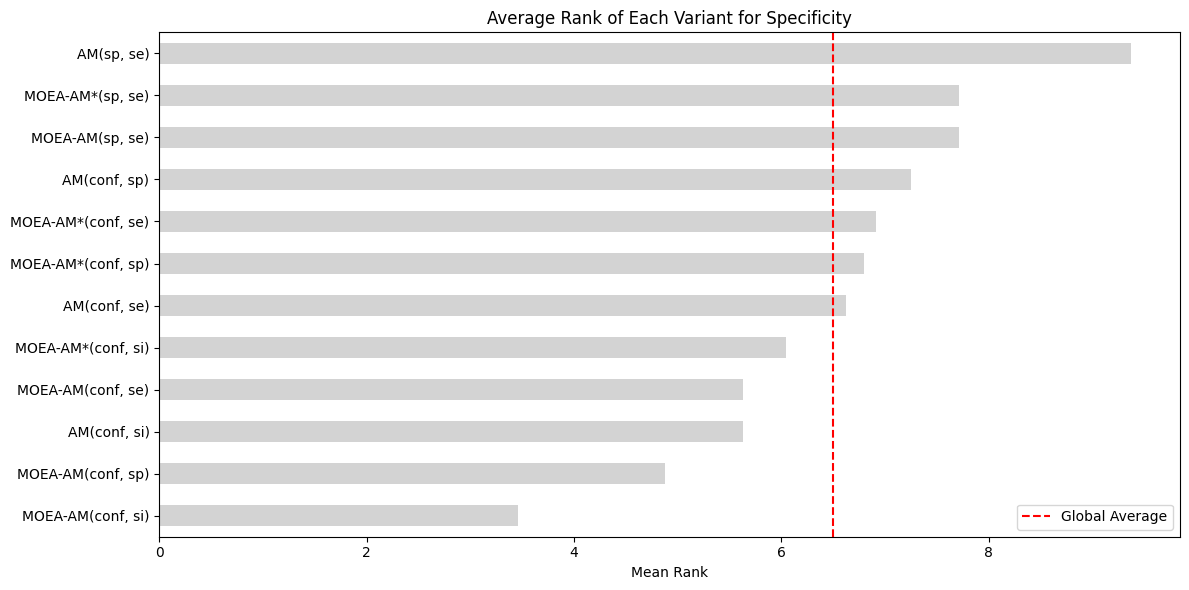

In [120]:
plot_avg_ranks(specificity_avg_ranks, "Specificity")

##### Friedman Tests

In [121]:
data = {
    "Accuracy": accuracy_dict,
    "F1 Score": f1_df,
    "Precision": precision_df,
    "Specificity": specificity_df
}

In [122]:
results = []

for metric, data in data.items():
    df = pd.DataFrame(data, index=datasets)
    
    stat, p_value = friedmanchisquare(*[df[col] for col in df.columns])
    
    results.append({
        "Metric": metric,
        "Chi-square Stat": stat,
        "P-value": p_value
    })

summary = pd.DataFrame(results)
summary

,Metric,Chi-square Stat,P-value
0,Accuracy,10.826185,0.457938
1,F1 Score,9.754650,0.552582
2,Precision,8.981260,0.623622
3,Specificity,26.613949,0.005254


##### Wilcoxon Test

In [124]:
algos = f1_df.columns
n = len(algos)
p_matrix = pd.DataFrame(index=algos, columns=algos, dtype=float)

print(f"{'='*10} Significant Pairs (p < 0.05) {'='*10}")

for i in range(n):
    for j in range(i + 1, n): 
        algo_a = algos[i]
        algo_b = algos[j]
        
        stat, p = wilcoxon(f1_df[algo_a], f1_df[algo_b], zero_method='zsplit')
        
        p_matrix.iloc[i, j], p_matrix.iloc[j, i] = p, p
        
        if p < 0.05:
            print(f"{algo_a} and {algo_b}: p={p:.5f}")

np.fill_diagonal(p_matrix.values, 1.0)

========== Significant Pairs (p < 0.05) ==========
MOEA-AM*(conf, sp) and AM(conf, se): p=0.04688


In [ ]:
p_matrix = p_matrix.map(lambda x: f"{x:.3f}")
p_matrix

,"AM(sp, se)","MOEA-AM(sp, se)","MOEA-AM*(sp, se)","AM(conf, si)","MOEA-AM(conf, si)","MOEA-AM*(conf, si)","AM(conf, sp)","MOEA-AM(conf, sp)","MOEA-AM*(conf, sp)","AM(conf, se)","MOEA-AM(conf, se)","MOEA-AM*(conf, se)"
"AM(sp, se)",1.000,0.424,0.424,0.301,0.027,0.301,0.380,0.001,0.064,0.359,0.176,0.204
"MOEA-AM(sp, se)",0.424,1.000,0.969,0.319,0.008,0.188,0.880,0.031,0.465,0.492,0.016,0.217
"MOEA-AM*(sp, se)",0.424,0.969,1.000,0.319,0.002,0.217,0.880,0.020,0.227,0.446,0.117,0.281
"AM(conf, si)",0.301,0.319,0.319,1.000,0.596,0.939,0.217,0.703,0.541,0.544,0.544,0.544
"MOEA-AM(conf, si)",0.027,0.008,0.002,0.596,1.000,0.141,0.018,0.438,0.004,0.217,0.258,0.002
"MOEA-AM*(conf, si)",0.301,0.188,0.217,0.939,0.141,1.000,0.879,0.199,0.297,0.293,0.893,0.217
"AM(conf, sp)",0.380,0.880,0.880,0.217,0.018,0.879,1.000,0.084,0.596,1.000,0.703,0.880
"MOEA-AM(conf, sp)",0.001,0.031,0.020,0.703,0.438,0.199,0.084,1.000,0.195,0.117,0.617,0.248
"MOEA-AM*(conf, sp)",0.064,0.465,0.227,0.541,0.004,0.297,0.596,0.195,1.000,0.880,0.789,0.596
"AM(conf, se)",0.359,0.492,0.446,0.544,0.217,0.293,1.000,0.117,0.880,1.000,0.775,0.493


In [ ]:
path = "C:\\Users\\mokad\\Documents\\Github\\Ant-Miner\\datasets\\SLC\\tic-tac-toe.csv"

dataframe = pd.read_csv(path)

dataframe.duplicated().sum()

np.int64(0)